In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key


In [2]:
shootings_df = pd.read_csv("school_shootings.csv")
shootings_df

,Date,Location,Deaths,Injuries,Description
0,1/7/1980,"Stamps, Arkansas",1,0,"16-year-old Evan Hampton, high school freshman..."
1,3/20/1980,"Dallas, Texas",1,0,"49-year-old fifth grade teacher, Rosie Pearson..."
2,3/26/1980,"Big Rapids, Michigan",1,0,Business professor Robert Brauer was killed in...
3,10/31/1980,"Hueytown, Alabama",1,1,"17-year-old Rudy Farmer, pulled out a .22 cali..."
4,1/27/1981,"Fayetteville, Arkansas",1,1,"19-year-old former freshman, James Howard Tayl..."
5,4/17/1981,"Ann Arbor, Michigan",2,0,"As students fled their rooms, after a homemade..."
6,12/16/1981,"Portland, Oregon",2,0,Shortly before noon in Engineering Hall on the...
7,3/19/1982,"Las Vegas, Nevada",1,2,"17-year-old Valley High School student, Patric..."
8,4/7/1982,"Littleton, Colorado",1,0,13-year-old Deer Creek Junior High School stud...
9,11/12/1982,"Jackson, Mississippi",2,0,"18-year-old school dropout, James Hartzog, kil..."


In [3]:
#location_df = shootings_df["Location"]
#location_df1 = pd.DataFrame(location_df)
#location_df1.to_csv('location.csv')

In [4]:
#location_df1.head()

In [5]:
city_df = pd.concat([shootings_df['Location'].str.split(', ', expand=True)], axis=1)


city_df.head()

,0,1
0,Stamps,Arkansas
1,Dallas,Texas
2,Big Rapids,Michigan
3,Hueytown,Alabama
4,Fayetteville,Arkansas


In [6]:
city_df.columns = ['City','State']
city_df.head()

,City,State
0,Stamps,Arkansas
1,Dallas,Texas
2,Big Rapids,Michigan
3,Hueytown,Alabama
4,Fayetteville,Arkansas


In [7]:
#make a list
city_list = city_df["City"].tolist()
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [22]:
# Loop through the list of cities and perform a request for data on each
temp =[]
humidity = []
for city in city_list:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
    except:
        temp.append("NaN")
        humidity.append("NaN")

In [23]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_list,
    "temp": temp,
    "humidity":humidity
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,humidity,temp
0,Stamps,52,33.53
1,Dallas,46,33.93
2,Big Rapids,41,25.74
3,Hueytown,32,34.21
4,Fayetteville,58,30.01


In [24]:
#merge two dataframe
#frames = [shootings_df, weather_data]
result = pd.concat([shootings_df, weather_data], axis=1)
#result = pd.concat(frames)
result

,Date,Location,Deaths,Injuries,Description,city,humidity,temp
0,1/7/1980,"Stamps, Arkansas",1,0,"16-year-old Evan Hampton, high school freshman...",Stamps,52,33.53
1,3/20/1980,"Dallas, Texas",1,0,"49-year-old fifth grade teacher, Rosie Pearson...",Dallas,46,33.93
2,3/26/1980,"Big Rapids, Michigan",1,0,Business professor Robert Brauer was killed in...,Big Rapids,41,25.74
3,10/31/1980,"Hueytown, Alabama",1,1,"17-year-old Rudy Farmer, pulled out a .22 cali...",Hueytown,32,34.21
4,1/27/1981,"Fayetteville, Arkansas",1,1,"19-year-old former freshman, James Howard Tayl...",Fayetteville,58,30.01
5,4/17/1981,"Ann Arbor, Michigan",2,0,"As students fled their rooms, after a homemade...",Ann Arbor,51,27.54
6,12/16/1981,"Portland, Oregon",2,0,Shortly before noon in Engineering Hall on the...,Portland,52,18.25
7,3/19/1982,"Las Vegas, Nevada",1,2,"17-year-old Valley High School student, Patric...",Las Vegas,5,35.48
8,4/7/1982,"Littleton, Colorado",1,0,13-year-old Deer Creek Junior High School stud...,Littleton,23,30.75
9,11/12/1982,"Jackson, Mississippi",2,0,"18-year-old school dropout, James Hartzog, kil...",Jackson,41,32.5


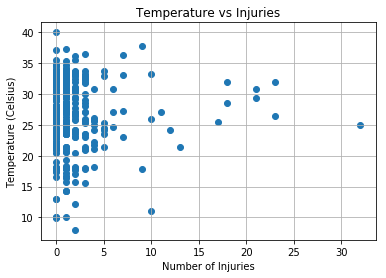

In [26]:
# Build a scatter plot for each data type
try:
    plt.scatter(result["Injuries"], result["temp"], marker="o")
except ValueError:
    print(" ")
    

# Incorporate the other graph properties
plt.title("Temperature vs Injuries")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Number of Injuries")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

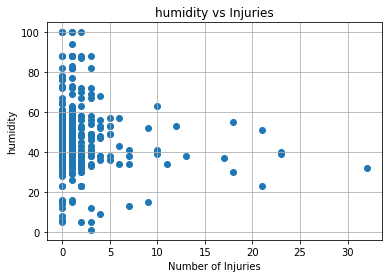

In [27]:
# Build a scatter plot for each data type
try:
    plt.scatter(result["Injuries"], result["humidity"], marker="o")
except ValueError:
    print(" ")
    

# Incorporate the other graph properties
plt.title("humidity vs Injuries")
plt.ylabel("humidity")
plt.xlabel("Number of Injuries")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

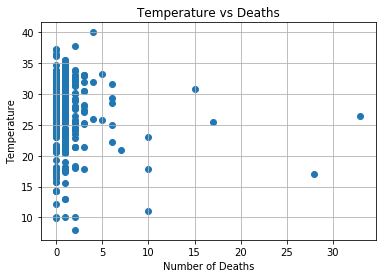

In [29]:
try:
    plt.scatter(result["Deaths"], result["temp"], marker="o")
except ValueError:
    print(" ")
    

# Incorporate the other graph properties
plt.title("Temperature vs Deaths")
plt.ylabel("Temperature")
plt.xlabel("Number of Deaths")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

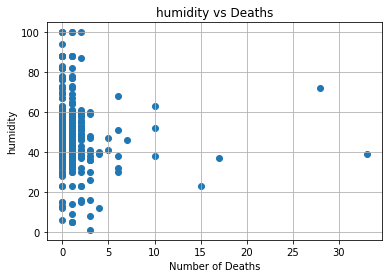

In [28]:
try:
    plt.scatter(result["Deaths"], result["humidity"], marker="o")
except ValueError:
    print(" ")
    

# Incorporate the other graph properties
plt.title("humidity vs Deaths")
plt.ylabel("humidity")
plt.xlabel("Number of Deaths")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()